In [1]:
import pandas as pd
import sklearn
from joblib import dump, load
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
plt.rcParams [ 'figure.figsize'] = ( 8, 8 )

In [2]:
import joblib
#joblib.__version__
#pd.__version__
sklearn.__version__

'1.0.2'

In [3]:
def confusion_matrix_relaxed(confusion_matrix_temp):
    # returns the relative number of predictions which are
    # +/- 1 compared to the actual result should be provided.
    i_cnt = confusion_matrix_temp.shape[0]
    j_cnt = confusion_matrix_temp.shape[1]
    bin_matrix_temp = confusion_matrix_temp.copy()
    for i in range(0, i_cnt):
        for j in range(0, j_cnt):
            if (abs(i-j)==1):
                bin_matrix_temp[i,j] = abs(i-j)
            else:
                bin_matrix_temp[i,j] = 0
    return ((confusion_matrix_temp*bin_matrix_temp).sum()) / (confusion_matrix_temp.sum())

In [4]:
#modelRF_lrgen = load('./models/gsRFC_lrgen_CART_fulltarget.joblib')
#modelRFreduced_lrgen = load('./models/gsRFC_lrgen_CART_reducedtarget_4l3c4r.joblib')
#modelRF_lrecon = load('./models/gsRFC_lrecon_CART_fulltarget.joblib')
#modelRFreduced_lrecon = load('./models/gsRFC_lrecon_CART_reducedtarget_4l3c4r.joblib')
#modelRF_galtan = load('./models/gsRFC_galtan_CART_fulltarget.joblib')
#modelRFreduced_galtan = load('./models/gsRFC_galtan_CART_reducedtarget_4l3c4r.joblib')

modelRF_lrgen = load('./models/gsRFC_lrgen_fulltarget_NoImputation.joblib')
modelRFreduced_lrgen = load('./models/gsRFC_lrgen_reducedtarget_4l3c4r_NoImputation.joblib')
modelRF_lrecon = load('./models/gsRFC_lrecon_fulltarget_NoImputation.joblib')
modelRFreduced_lrecon = load('./models/gsRFC_lrecon_reducedtarget_4l3c4r_NoImputation.joblib')
modelRF_galtan = load('./models/gsRFC_galtan_fulltarget_NoImputation.joblib')
modelRFreduced_galtan = load('./models/gsRFC_galtan_reducedtarget_4l3c4r_NoImputation.joblib')

In [5]:
voter_data_full_entire = pd.read_csv('data/voter_table.csv')

In [6]:
voter_data = ['econ_interven', 'environment', 'redistribution', 'civlib_laworder', 'immigrate_policy', 'sociallifestyle', 'lrgen_selfdescription']
# remove rows with nan's
voter_data_full = voter_data_full_entire[voter_data]
voter_data_full_woNAN = voter_data_full.dropna().reset_index()
voter_data_full_entire = voter_data_full_entire.reset_index()

In [7]:
voter_data_full_woNAN

,index,econ_interven,environment,redistribution,civlib_laworder,immigrate_policy,sociallifestyle,lrgen_selfdescription
0,0,5.0,2.0,3.0,3.0,5.0,0.0,3.0
1,1,6.0,4.0,4.0,2.0,3.0,0.0,4.0
2,2,4.0,0.0,5.0,4.0,6.0,0.0,3.0
3,3,2.0,1.0,4.0,5.0,4.0,3.0,3.0
4,4,6.0,0.0,0.0,3.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
20181,26530,5.0,3.0,2.0,5.0,5.0,5.0,3.0
20182,26531,1.0,6.0,3.0,3.0,10.0,0.0,10.0
20183,26532,5.0,4.0,5.0,8.0,10.0,5.0,5.0
20184,26533,9.0,2.0,0.0,3.0,0.0,3.0,0.0


In [8]:
voter_data_full_entire

,index,respid,hCountry,countrycode,Q9_ees_numeric,lrgen_selfdescription,econ_interven,redistribution,sociallifestyle,civlib_laworder,...,prediction_lm_lrecon1,prediction_polr_lrecon1,prediction_rf_lrecon1,prediction_rf_lrecon2,prediction_rf_lrecon2_unrounded,prediction_lm_galtan1,prediction_polr_galtan1,prediction_rf_galtan1,prediction_rf_galtan2,prediction_rf_galtan2_unrounded
0,0,7762,1,1040,NaN,3.0,5.0,3.0,0.0,3.0,...,4.0,4.0,5.0,5.0,4.663037,2.0,3.0,0.0,2.0,2.306471
1,1,7801,1,1040,1040600.0,4.0,6.0,4.0,0.0,2.0,...,5.0,5.0,6.0,6.0,5.762113,1.0,2.0,0.0,1.0,1.333388
2,2,7904,1,1040,NaN,3.0,4.0,5.0,0.0,4.0,...,4.0,5.0,5.0,5.0,4.666921,3.0,5.0,0.0,2.0,2.131756
3,3,9223,1,1040,NaN,3.0,2.0,4.0,3.0,5.0,...,3.0,3.0,4.0,4.0,3.696567,4.0,5.0,4.0,4.0,3.793295
4,4,9338,1,1040,1040320.0,1.0,6.0,0.0,0.0,3.0,...,3.0,3.0,2.0,3.0,3.235630,1.0,1.0,0.0,1.0,1.068495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26533,26533,49108,28,1826,1826210.0,0.0,9.0,0.0,3.0,3.0,...,5.0,5.0,1.0,3.0,3.232053,2.0,1.0,3.0,3.0,3.136494
26534,26534,49112,28,1826,1826110.0,5.0,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26535,26535,49114,28,1826,1826903.0,5.0,5.0,5.0,8.0,4.0,...,5.0,5.0,5.0,5.0,5.238173,6.0,3.0,8.0,7.0,6.597650
26536,26536,49115,28,1826,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# RF full target space: lrgen

In [9]:
# econ_interven 	environment 	redistribution 	civlib_laworder 	immigrate_policy 	sociallifestyle
test_X = voter_data_full_woNAN[['econ_interven', 'environment', 'redistribution', 'civlib_laworder', 'immigrate_policy', 'sociallifestyle']]
test_y = voter_data_full_woNAN[['lrgen_selfdescription']]

In [10]:
test_X

,econ_interven,environment,redistribution,civlib_laworder,immigrate_policy,sociallifestyle
0,5.0,2.0,3.0,3.0,5.0,0.0
1,6.0,4.0,4.0,2.0,3.0,0.0
2,4.0,0.0,5.0,4.0,6.0,0.0
3,2.0,1.0,4.0,5.0,4.0,3.0
4,6.0,0.0,0.0,3.0,0.0,0.0
...,...,...,...,...,...,...
20181,5.0,3.0,2.0,5.0,5.0,5.0
20182,1.0,6.0,3.0,3.0,10.0,0.0
20183,5.0,4.0,5.0,8.0,10.0,5.0
20184,9.0,2.0,0.0,3.0,0.0,3.0


In [11]:
### Write several scores to the output ###

RMSE = True
model_vector = [modelRF_lrgen]
for model in model_vector:
    print(model.estimator.named_steps)
    print('Accuracy Score: ', sklearn.metrics.accuracy_score(test_y, model.predict(test_X)))
    print('Balanced Accuracy Score: ', sklearn.metrics.balanced_accuracy_score(test_y, model.predict(test_X)))
    print('Cohen-Kappa-Score: ', sklearn.metrics.cohen_kappa_score(test_y, model.predict(test_X)))
    print('F1-Score: ', sklearn.metrics.f1_score(test_y, model.predict(test_X), average='weighted'))
    if RMSE == True:
        print('RMSE: ', sqrt(sklearn.metrics.mean_squared_error(test_y, model.predict(test_X))))
        #print('ROC-AUC-Score: ', sklearn.metrics.roc_auc_score(test_y, 
        #                                                       model.predict(test_X), 
        #                                                       average='weighted', 
        #                                                       multi_class='ovo'))
    print('__________________________________\n')

for model in model_vector:
    print('Confusion matrix: \n', sklearn.metrics.confusion_matrix(test_y, model.predict(test_X)))

for model in model_vector:
    print(sklearn.metrics.classification_report(test_y, model.predict(test_X)))

{'standardscaler': StandardScaler(), 'randomforestclassifier': RandomForestClassifier(criterion='entropy', random_state=1)}
Accuracy Score:  0.18488061032398692
Balanced Accuracy Score:  0.16915893962909886
Cohen-Kappa-Score:  0.0822839713751895
F1-Score:  0.19317446076318734
RMSE:  2.9283274331149407
__________________________________

Confusion matrix: 
 [[ 188   99  194  118  165  120   84   73   66   91   21]
 [  36   52  119   81   82   67   58   54   36   25   10]
 [  39   64  192  204  196  157  122   75   53   50    2]
 [  45   40  197  265  342  250  199  146   80   71    8]
 [  25   31  111  223  330  349  261  168   84   68   11]
 [ 187  153  286  505  743 1315  979  622  461  516   65]
 [  34   31   63  128  211  350  465  320  175  174   24]
 [  24   24   58  133  188  288  441  385  278  250   45]
 [  25   24   43   93  129  186  289  266  273  285   35]
 [  19   17   16   48   47   49  113  102  118  155   27]
 [ 114   69   34   84   94  143  193  135  207  424  112]]
  

In [12]:
confusion_matrix_relaxed(sklearn.metrics.confusion_matrix(test_y, model.predict(test_X)))

0.29049836520360645

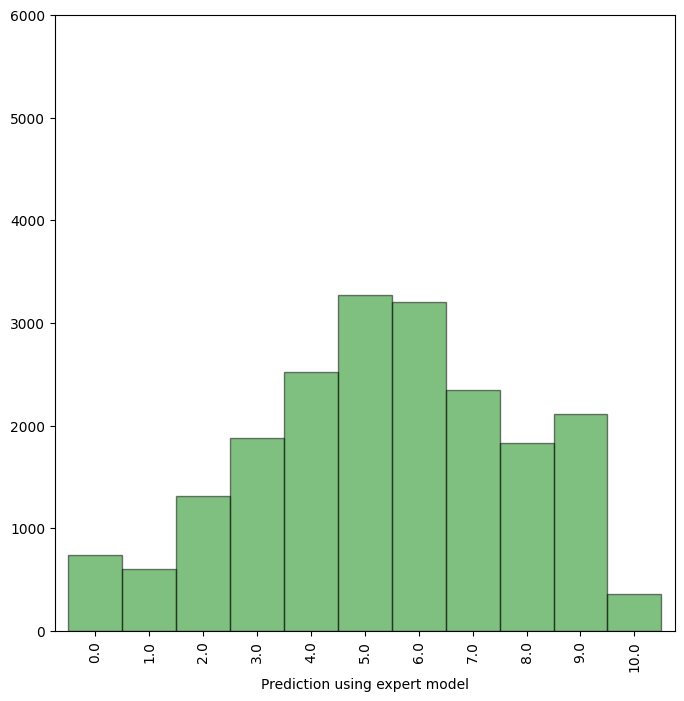

In [13]:
plotdata_predicted = pd.DataFrame(modelRF_lrgen.predict(test_X))#
plotdata_predicted.columns = ['Prediction using expert model']
plotdata_predicted = plotdata_predicted.value_counts(sort=False).reset_index()
plotdata_predicted.columns = ['Prediction using expert model', 'Total']
plotdata_predicted.set_index(['Prediction using expert model'], inplace = True)
plotdata_predicted.plot(kind='bar', legend=False, ylim=(0,6000), color='g', alpha=0.5, width=1.0, edgecolor='black')
plt.savefig('pics/PRED_VALUES_EVS_DATA_low_resolution', dpi=300)

#plt.xlabel('Prediction using expert model')
#.plot(kind='bar')
#fig.set_xlabel('Prediction using expert model')

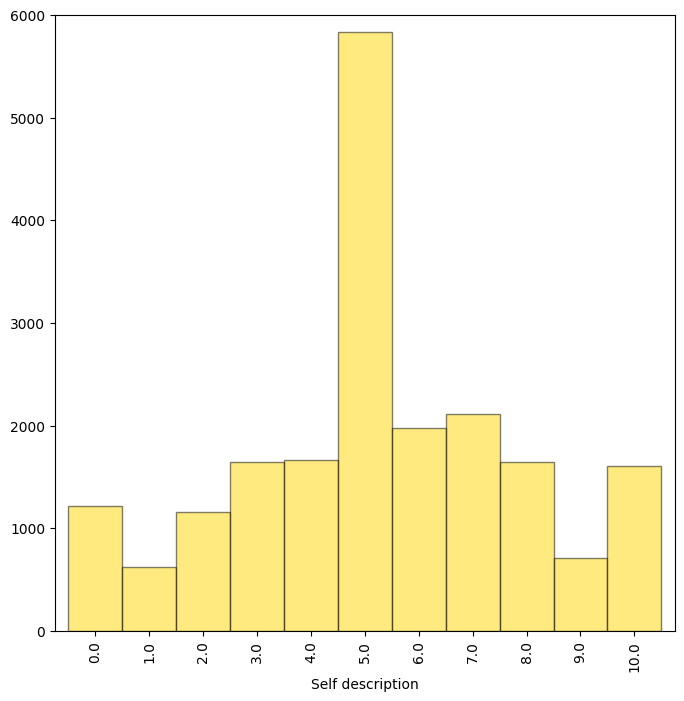

In [14]:
plotdata_actual = test_y.value_counts(sort=False)
plotdata_actual = plotdata_actual.reset_index()
plotdata_actual.columns = ['Self description', 'Total']
plotdata_actual.set_index(['Self description'], inplace = True)
plotdata_actual.plot(kind='bar', legend = False, ylim=(0,6000), color='gold', alpha=0.5, width=1.0, edgecolor='black')
plt.savefig('pics/ACTUAL_SELF_EVS_DATA_low_resolution', dpi=150)
#plt.xlabel('Actual self description')
#plt.xticks(range(1,12))

In [15]:
tempdata_actual = test_y.copy()
tempdata_actual['Type'] = 'Self description'
tempdata_actual.columns = ['value', 'Type']
tempdata_predicted = pd.DataFrame(modelRF_lrgen.predict(test_X))
tempdata_predicted['Type'] = 'Prediction using expert model'
tempdata_predicted.columns = ['value', 'Type']
tempdata = pd.concat([tempdata_actual, tempdata_predicted]).reset_index(drop=True)
tempdata

,value,Type
0,3.0,Self description
1,4.0,Self description
2,3.0,Self description
3,3.0,Self description
4,1.0,Self description
...,...,...
40367,4.0,Prediction using expert model
40368,4.0,Prediction using expert model
40369,10.0,Prediction using expert model
40370,2.0,Prediction using expert model


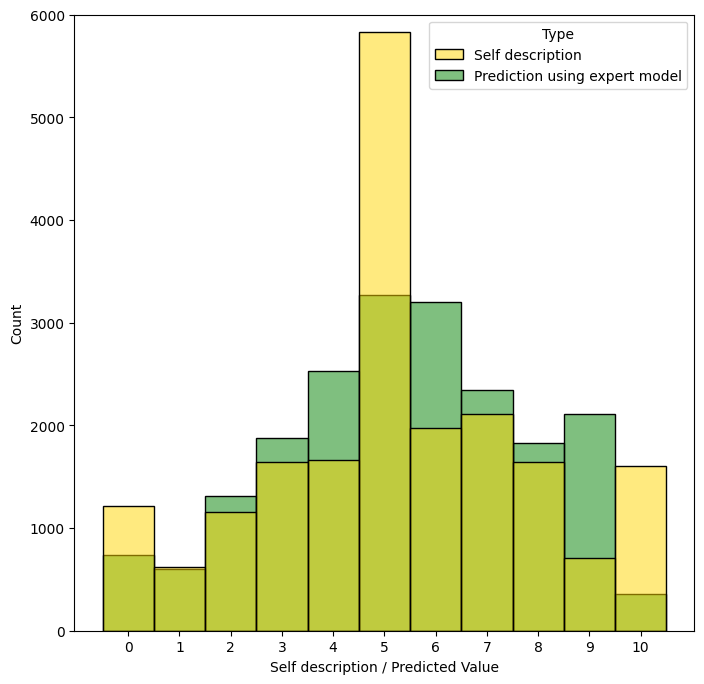

In [16]:
#sns.set_style("whitegrid")
ax = sns.histplot(data=tempdata, x='value', hue='Type', palette=['gold', 'g'], alpha = 0.5, multiple='layer', discrete=True, edgecolor='black')
ax.set(xlabel='Self description / Predicted Value',
       ylim=(0,6000),
       xticks=range(0,11))
plt.savefig('pics/ACTUAL_PRED_COMPARISON_EVS_DATA_low_resolution', dpi=150)


In [17]:
pd.Series(model.predict(test_X))

0         5.0
1         5.0
2         5.0
3         3.0
4         2.0
         ... 
20181     4.0
20182     4.0
20183    10.0
20184     2.0
20185     5.0
Length: 20186, dtype: float64

In [18]:
#data_temp = pd.DataFrame(model.predict(test_X), test_y['lrgen_selfdescription'].values).reset_index()
#data_temp.columns = ['EVS_lrgen_predicted', 'EVS_lrgen_self']
#data_temp.to_csv('lrgen_full.csv')

In [19]:
voter_data_full_woNAN['predicted_values_lrgen'] = pd.Series(modelRF_lrgen.predict(test_X))

In [20]:
voter_data_full_woNAN

,index,econ_interven,environment,redistribution,civlib_laworder,immigrate_policy,sociallifestyle,lrgen_selfdescription,predicted_values_lrgen
0,0,5.0,2.0,3.0,3.0,5.0,0.0,3.0,5.0
1,1,6.0,4.0,4.0,2.0,3.0,0.0,4.0,5.0
2,2,4.0,0.0,5.0,4.0,6.0,0.0,3.0,5.0
3,3,2.0,1.0,4.0,5.0,4.0,3.0,3.0,3.0
4,4,6.0,0.0,0.0,3.0,0.0,0.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...
20181,26530,5.0,3.0,2.0,5.0,5.0,5.0,3.0,4.0
20182,26531,1.0,6.0,3.0,3.0,10.0,0.0,10.0,4.0
20183,26532,5.0,4.0,5.0,8.0,10.0,5.0,5.0,10.0
20184,26533,9.0,2.0,0.0,3.0,0.0,3.0,0.0,2.0


# RF reduced target space (4l3c4r): lrgen

In [21]:
# econ_interven 	environment 	redistribution 	civlib_laworder 	immigrate_policy 	sociallifestyle
test_X = voter_data_full_woNAN[['econ_interven', 'environment', 'redistribution', 'civlib_laworder', 'immigrate_policy', 'sociallifestyle']]
test_y = voter_data_full_woNAN[['lrgen_selfdescription']].replace({0: 'l', 1: 'l', 2: 'l', 3: 'l', 4: 'c', 5: 'c', 6: 'c', 7: 'r', 8: 'r', 9: 'r', 10: 'r'})

In [22]:
### Write several scores to the output ###

RMSE = False
model_vector = [modelRFreduced_lrgen]
for model in model_vector:
    print(model.estimator.named_steps)
    print('Accuracy Score: ', sklearn.metrics.accuracy_score(test_y, model.predict(test_X)))
    print('Balanced Accuracy Score: ', sklearn.metrics.balanced_accuracy_score(test_y, model.predict(test_X)))
    print('Cohen-Kappa-Score: ', sklearn.metrics.cohen_kappa_score(test_y, model.predict(test_X)))
    print('F1-Score: ', sklearn.metrics.f1_score(test_y, model.predict(test_X), average='weighted'))
    if RMSE == True:
        print('RMSE: ', sqrt(sklearn.metrics.mean_squared_error(test_y, model.predict(test_X))))
        #print('ROC-AUC-Score: ', sklearn.metrics.roc_auc_score(test_y, 
        #                                                       model.predict(test_X), 
        #                                                       average='weighted', 
        #                                                       multi_class='ovo'))
    print('__________________________________\n')

for model in model_vector:
    print('Confusion matrix: \n', sklearn.metrics.confusion_matrix(test_y, model.predict(test_X), labels=['l', 'c', 'r']))

for model in model_vector:
    print(sklearn.metrics.classification_report(test_y, model.predict(test_X)))

{'standardscaler': StandardScaler(), 'randomforestclassifier': RandomForestClassifier(criterion='entropy', random_state=1)}
Accuracy Score:  0.5176855246210245
Balanced Accuracy Score:  0.4998096246960613
Cohen-Kappa-Score:  0.23903632243934236
F1-Score:  0.516983049470728
__________________________________

Confusion matrix: 
 [[1997 1924  715]
 [1680 5462 2326]
 [ 770 2321 2991]]
              precision    recall  f1-score   support

           c       0.56      0.58      0.57      9468
           l       0.45      0.43      0.44      4636
           r       0.50      0.49      0.49      6082

    accuracy                           0.52     20186
   macro avg       0.50      0.50      0.50     20186
weighted avg       0.52      0.52      0.52     20186



<AxesSubplot:xlabel='0'>

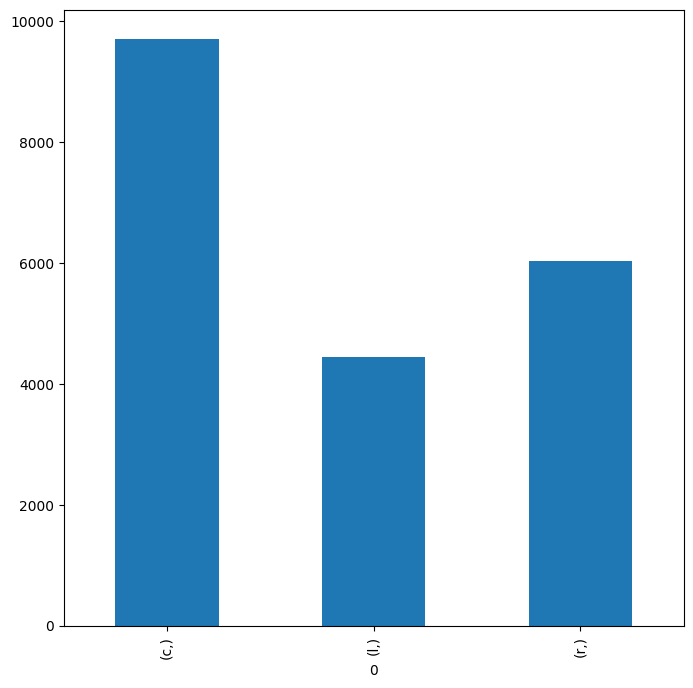

In [23]:
pd.DataFrame(modelRFreduced_lrgen.predict(test_X)).value_counts(sort=False).plot(kind='bar')

In [24]:
#data_temp = pd.DataFrame(model.predict(test_X), test_y['lrgen_selfdescription'].values).reset_index()
#data_temp.columns = ['EVS_lrgen_predicted', 'EVS_lrgen_self']
#data_temp.to_csv('lrgen_reduced.csv')

In [25]:
voter_data_full_woNAN['predicted_values_lrgen_reduced'] = pd.Series(modelRFreduced_lrgen.predict(test_X))

In [26]:
voter_data_full_woNAN

,index,econ_interven,environment,redistribution,civlib_laworder,immigrate_policy,sociallifestyle,lrgen_selfdescription,predicted_values_lrgen,predicted_values_lrgen_reduced
0,0,5.0,2.0,3.0,3.0,5.0,0.0,3.0,5.0,c
1,1,6.0,4.0,4.0,2.0,3.0,0.0,4.0,5.0,c
2,2,4.0,0.0,5.0,4.0,6.0,0.0,3.0,5.0,c
3,3,2.0,1.0,4.0,5.0,4.0,3.0,3.0,3.0,l
4,4,6.0,0.0,0.0,3.0,0.0,0.0,1.0,2.0,l
...,...,...,...,...,...,...,...,...,...,...
20181,26530,5.0,3.0,2.0,5.0,5.0,5.0,3.0,4.0,c
20182,26531,1.0,6.0,3.0,3.0,10.0,0.0,10.0,4.0,c
20183,26532,5.0,4.0,5.0,8.0,10.0,5.0,5.0,10.0,r
20184,26533,9.0,2.0,0.0,3.0,0.0,3.0,0.0,2.0,l


# RF full target space: lrecon

In [27]:
# econ_interven 	environment 	redistribution 	civlib_laworder 	immigrate_policy 	sociallifestyle
test_X = voter_data_full_woNAN[['econ_interven', 'environment', 'redistribution', 'civlib_laworder', 'immigrate_policy', 'sociallifestyle']]
test_y = voter_data_full_woNAN[['lrgen_selfdescription']]

In [28]:
### Write several scores to the output ###

RMSE = True
model_vector = [modelRF_lrecon]
for model in model_vector:
    print(model.estimator.named_steps)
    print('Accuracy Score: ', sklearn.metrics.accuracy_score(test_y, model.predict(test_X)))
    print('Balanced Accuracy Score: ', sklearn.metrics.balanced_accuracy_score(test_y, model.predict(test_X)))
    print('Cohen-Kappa-Score: ', sklearn.metrics.cohen_kappa_score(test_y, model.predict(test_X)))
    print('F1-Score: ', sklearn.metrics.f1_score(test_y, model.predict(test_X), average='weighted'))
    if RMSE == True:
        print('RMSE: ', sqrt(sklearn.metrics.mean_squared_error(test_y, model.predict(test_X))))
        #print('ROC-AUC-Score: ', sklearn.metrics.roc_auc_score(test_y, 
        #                                                       model.predict(test_X), 
        #                                                       average='weighted', 
        #                                                       multi_class='ovo'))
    print('__________________________________\n')

for model in model_vector:
    print('Confusion matrix: \n', sklearn.metrics.confusion_matrix(test_y, model.predict(test_X)))

for model in model_vector:
    print(sklearn.metrics.classification_report(test_y, model.predict(test_X)))

{'standardscaler': StandardScaler(), 'randomforestclassifier': RandomForestClassifier(criterion='entropy', random_state=1)}
Accuracy Score:  0.19810759932626573
Balanced Accuracy Score:  0.1635438636013974
Cohen-Kappa-Score:  0.08687721168184825
F1-Score:  0.20773809898251594
RMSE:  3.094654256905129
__________________________________

Confusion matrix: 
 [[ 161  171  191  178   91  168   38   73   33   56   59]
 [  29   57  118  129   43   93   23   47   41   18   22]
 [  33   87  174  267  133  197   72   88   60   30   13]
 [  40   68  166  339  258  298  122  170  113   50   19]
 [  21   58  133  248  267  400  167  193   96   57   21]
 [ 141  306  389  633  544 1689  521  692  423  307  187]
 [  32   61   79  173  160  430  289  330  254  111   56]
 [  24   57  108  147  163  403  218  393  413  117   71]
 [  26   41  100  135  117  260  126  270  336  154   83]
 [  16   35   45   60   30  107   44  101  153   62   58]
 [  80  154  105  131   60  237   88  158  175  189  232]]
   

<AxesSubplot:xlabel='Prediction using expert model'>

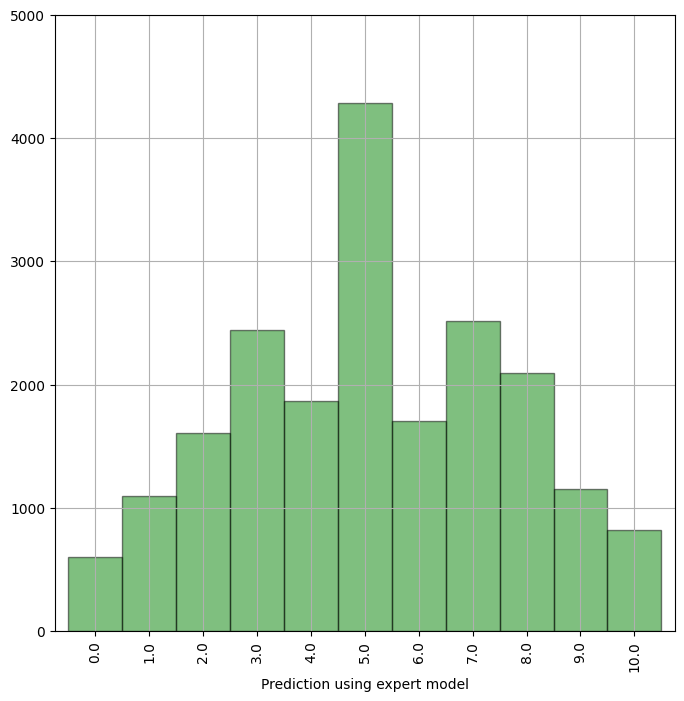

In [29]:
#pd.DataFrame().value_counts(sort=False).plot(kind='bar')

plotdata_predicted = pd.DataFrame(modelRF_lrecon.predict(test_X))#
plotdata_predicted.columns = ['Prediction using expert model']
plotdata_predicted = plotdata_predicted.value_counts(sort=False).reset_index()
plotdata_predicted.columns = ['Prediction using expert model', 'Total']
plotdata_predicted.set_index(['Prediction using expert model'], inplace = True)
plotdata_predicted.plot(kind='bar', legend=False, ylim=(0,5000), color='g', alpha=0.5, width=1.0, edgecolor='black', grid=True)
#plt.savefig('pics/PRED_VALUES_LRECON_EVS_DATA_low_resolution', dpi=150)

In [30]:
#test_y.value_counts(sort=False).plot(kind='bar')

In [31]:
voter_data_full_woNAN['predicted_values_lrecon'] = pd.Series(modelRF_lrecon.predict(test_X))

# RF reduced target space (4l3c4r): lrecon

In [32]:
# econ_interven 	environment 	redistribution 	civlib_laworder 	immigrate_policy 	sociallifestyle
test_X = voter_data_full_woNAN[['econ_interven', 'environment', 'redistribution', 'civlib_laworder', 'immigrate_policy', 'sociallifestyle']]
test_y = voter_data_full_woNAN[['lrgen_selfdescription']].replace({0: 'l', 1: 'l', 2: 'l', 3: 'l', 4: 'c', 5: 'c', 6: 'c', 7: 'r', 8: 'r', 9: 'r', 10: 'r'})

In [33]:
### Write several scores to the output ###

RMSE = False
model_vector = [modelRFreduced_lrecon]
for model in model_vector:
    print(model.estimator.named_steps)
    print('Accuracy Score: ', sklearn.metrics.accuracy_score(test_y, model.predict(test_X)))
    print('Balanced Accuracy Score: ', sklearn.metrics.balanced_accuracy_score(test_y, model.predict(test_X)))
    print('Cohen-Kappa-Score: ', sklearn.metrics.cohen_kappa_score(test_y, model.predict(test_X)))
    print('F1-Score: ', sklearn.metrics.f1_score(test_y, model.predict(test_X), average='weighted'))
    if RMSE == True:
        print('RMSE: ', sqrt(sklearn.metrics.mean_squared_error(test_y, model.predict(test_X))))
        #print('ROC-AUC-Score: ', sklearn.metrics.roc_auc_score(test_y, 
        #                                                       model.predict(test_X), 
        #                                                       average='weighted', 
        #                                                       multi_class='ovo'))
    print('__________________________________\n')

for model in model_vector:
    print('Confusion matrix: \n', sklearn.metrics.confusion_matrix(test_y, model.predict(test_X), labels=['l', 'c', 'r']))

for model in model_vector:
    print(sklearn.metrics.classification_report(test_y, model.predict(test_X)))

{'standardscaler': StandardScaler(), 'randomforestclassifier': RandomForestClassifier(criterion='entropy', random_state=1)}
Accuracy Score:  0.4832061825027247
Balanced Accuracy Score:  0.4785453077634989
Cohen-Kappa-Score:  0.20376605247379398
F1-Score:  0.4861041988928641
__________________________________

Confusion matrix: 
 [[2167 1661  808]
 [2233 4749 2486]
 [1261 1983 2838]]
              precision    recall  f1-score   support

           c       0.57      0.50      0.53      9468
           l       0.38      0.47      0.42      4636
           r       0.46      0.47      0.46      6082

    accuracy                           0.48     20186
   macro avg       0.47      0.48      0.47     20186
weighted avg       0.49      0.48      0.49     20186



In [34]:
voter_data_full_woNAN['predicted_values_lrecon_reduced'] = pd.Series(modelRFreduced_lrecon.predict(test_X))

In [35]:
voter_data_full_woNAN

,index,econ_interven,environment,redistribution,civlib_laworder,immigrate_policy,sociallifestyle,lrgen_selfdescription,predicted_values_lrgen,predicted_values_lrgen_reduced,predicted_values_lrecon,predicted_values_lrecon_reduced
0,0,5.0,2.0,3.0,3.0,5.0,0.0,3.0,5.0,c,5.0,c
1,1,6.0,4.0,4.0,2.0,3.0,0.0,4.0,5.0,c,5.0,c
2,2,4.0,0.0,5.0,4.0,6.0,0.0,3.0,5.0,c,6.0,c
3,3,2.0,1.0,4.0,5.0,4.0,3.0,3.0,3.0,l,3.0,c
4,4,6.0,0.0,0.0,3.0,0.0,0.0,1.0,2.0,l,2.0,c
...,...,...,...,...,...,...,...,...,...,...,...,...
20181,26530,5.0,3.0,2.0,5.0,5.0,5.0,3.0,4.0,c,3.0,c
20182,26531,1.0,6.0,3.0,3.0,10.0,0.0,10.0,4.0,c,3.0,l
20183,26532,5.0,4.0,5.0,8.0,10.0,5.0,5.0,10.0,r,5.0,c
20184,26533,9.0,2.0,0.0,3.0,0.0,3.0,0.0,2.0,l,3.0,l


# RF full target space: galtan

In [36]:
# econ_interven 	environment 	redistribution 	civlib_laworder 	immigrate_policy 	sociallifestyle
test_X = voter_data_full_woNAN[['econ_interven', 'environment', 'redistribution', 'civlib_laworder', 'immigrate_policy', 'sociallifestyle']]
test_y = voter_data_full_woNAN[['lrgen_selfdescription']]

In [37]:
### Write several scores to the output ###

RMSE = True
model_vector = [modelRF_galtan]
for model in model_vector:
    print(model.estimator.named_steps)
    print('Accuracy Score: ', sklearn.metrics.accuracy_score(test_y, model.predict(test_X)))
    print('Balanced Accuracy Score: ', sklearn.metrics.balanced_accuracy_score(test_y, model.predict(test_X)))
    print('Cohen-Kappa-Score: ', sklearn.metrics.cohen_kappa_score(test_y, model.predict(test_X)))
    print('F1-Score: ', sklearn.metrics.f1_score(test_y, model.predict(test_X), average='weighted'))
    if RMSE == True:
        print('RMSE: ', sqrt(sklearn.metrics.mean_squared_error(test_y, model.predict(test_X))))
        #print('ROC-AUC-Score: ', sklearn.metrics.roc_auc_score(test_y, 
        #                                                       model.predict(test_X), 
        #                                                       average='weighted', 
        #                                                       multi_class='ovo'))
    print('__________________________________\n')

for model in model_vector:
    print('Confusion matrix: \n', sklearn.metrics.confusion_matrix(test_y, model.predict(test_X)))

for model in model_vector:
    print(sklearn.metrics.classification_report(test_y, model.predict(test_X)))

{'standardscaler': StandardScaler(), 'randomforestclassifier': RandomForestClassifier(criterion='entropy', random_state=1)}
Accuracy Score:  0.16184484296046764
Balanced Accuracy Score:  0.15715779965877094
Cohen-Kappa-Score:  0.06678847427486423
F1-Score:  0.1622473924753483
RMSE:  3.831381060178802
__________________________________

Confusion matrix: 
 [[ 482  135   53   44   46  129   26   30   48   30  196]
 [ 202   77   62   33   16   63   16   24   43   15   69]
 [ 354  150  106   71   61  136   41   33   77   34   91]
 [ 489  170  114  109  101  232   64   53  158   37  116]
 [ 374  155  123  131  126  269   91   57  172   52  111]
 [ 999  429  333  326  363 1087  342  278  630  309  736]
 [ 281  125  102  124  131  325  185  138  261   94  209]
 [ 237  152   82  131  139  286  186  177  339  131  254]
 [ 188  106   75   71   75  206  132  133  271  113  278]
 [  79   39   34   31   20   79   43   67   98   57  164]
 [ 233  115   51   39   33  127   71   91  158  101  590]]
   

<AxesSubplot:xlabel='Prediction using expert model'>

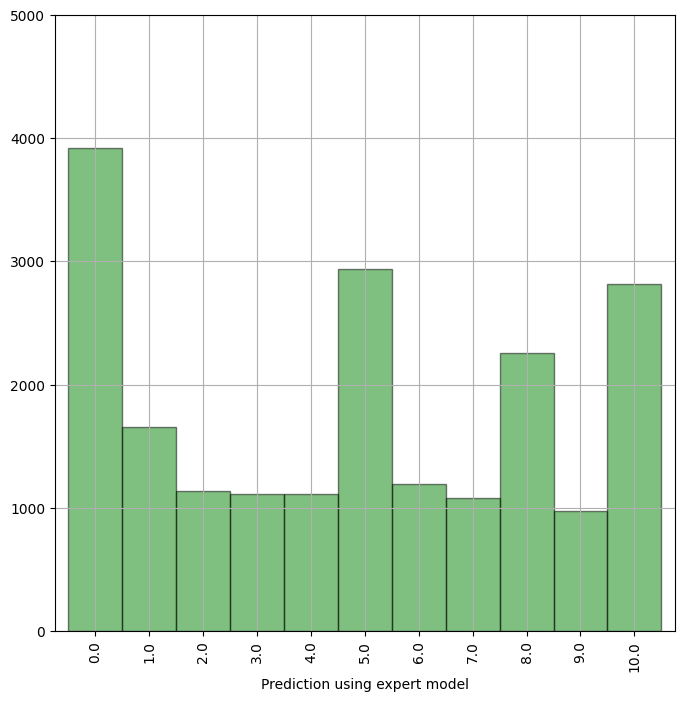

In [38]:
#pd.DataFrame(modelRF_galtan.predict(test_X)).value_counts(sort=False).plot(kind='bar')

plotdata_predicted = pd.DataFrame(modelRF_galtan.predict(test_X))#
plotdata_predicted.columns = ['Prediction using expert model']
plotdata_predicted = plotdata_predicted.value_counts(sort=False).reset_index()
plotdata_predicted.columns = ['Prediction using expert model', 'Total']
plotdata_predicted.set_index(['Prediction using expert model'], inplace = True)
plotdata_predicted.plot(kind='bar', legend=False, ylim=(0,5000), color='g', alpha=0.5, width=1.0, edgecolor='black', grid=True)
#plt.savefig('pics/PRED_VALUES_GALTAN_EVS_DATA_low_resolution', dpi=150)

In [39]:
voter_data_full_woNAN['predicted_values_galtan'] = pd.Series(modelRF_galtan.predict(test_X))

# RF reduced target space (4l3c4r): galtan

In [40]:
# econ_interven 	environment 	redistribution 	civlib_laworder 	immigrate_policy 	sociallifestyle
test_X = voter_data_full_woNAN[['econ_interven', 'environment', 'redistribution', 'civlib_laworder', 'immigrate_policy', 'sociallifestyle']]
test_y = voter_data_full_woNAN[['lrgen_selfdescription']].replace({0: 'l', 1: 'l', 2: 'l', 3: 'l', 4: 'c', 5: 'c', 6: 'c', 7: 'r', 8: 'r', 9: 'r', 10: 'r'})

In [41]:
### Write several scores to the output ###

RMSE = False
model_vector = [modelRFreduced_galtan]
for model in model_vector:
    print(model.estimator.named_steps)
    print('Accuracy Score: ', sklearn.metrics.accuracy_score(test_y, model.predict(test_X)))
    print('Balanced Accuracy Score: ', sklearn.metrics.balanced_accuracy_score(test_y, model.predict(test_X)))
    print('Cohen-Kappa-Score: ', sklearn.metrics.cohen_kappa_score(test_y, model.predict(test_X)))
    print('F1-Score: ', sklearn.metrics.f1_score(test_y, model.predict(test_X), average='weighted'))
    if RMSE == True:
        print('RMSE: ', sqrt(sklearn.metrics.mean_squared_error(test_y, model.predict(test_X))))
        #print('ROC-AUC-Score: ', sklearn.metrics.roc_auc_score(test_y, 
        #                                                       model.predict(test_X), 
        #                                                       average='weighted', 
        #                                                       multi_class='ovo'))
    print('__________________________________\n')

for model in model_vector:
    print('Confusion matrix: \n', sklearn.metrics.confusion_matrix(test_y, model.predict(test_X), labels=['l', 'c', 'r']))

for model in model_vector:
    print(sklearn.metrics.classification_report(test_y, model.predict(test_X)))

{'standardscaler': StandardScaler(), 'randomforestclassifier': RandomForestClassifier(criterion='entropy', random_state=1)}
Accuracy Score:  0.4193500445853562
Balanced Accuracy Score:  0.45927489061435395
Cohen-Kappa-Score:  0.15528977938935118
F1-Score:  0.4107990609796916
__________________________________

Confusion matrix: 
 [[2729  816 1091]
 [3583 2618 3267]
 [1641 1323 3118]]
              precision    recall  f1-score   support

           c       0.55      0.28      0.37      9468
           l       0.34      0.59      0.43      4636
           r       0.42      0.51      0.46      6082

    accuracy                           0.42     20186
   macro avg       0.44      0.46      0.42     20186
weighted avg       0.46      0.42      0.41     20186



In [42]:
voter_data_full_woNAN['predicted_values_galtan_reduced'] = pd.Series(modelRFreduced_galtan.predict(test_X))

In [43]:
voter_data_full_woNAN

,index,econ_interven,environment,redistribution,civlib_laworder,immigrate_policy,sociallifestyle,lrgen_selfdescription,predicted_values_lrgen,predicted_values_lrgen_reduced,predicted_values_lrecon,predicted_values_lrecon_reduced,predicted_values_galtan,predicted_values_galtan_reduced
0,0,5.0,2.0,3.0,3.0,5.0,0.0,3.0,5.0,c,5.0,c,0.0,l
1,1,6.0,4.0,4.0,2.0,3.0,0.0,4.0,5.0,c,5.0,c,0.0,l
2,2,4.0,0.0,5.0,4.0,6.0,0.0,3.0,5.0,c,6.0,c,1.0,l
3,3,2.0,1.0,4.0,5.0,4.0,3.0,3.0,3.0,l,3.0,c,3.0,l
4,4,6.0,0.0,0.0,3.0,0.0,0.0,1.0,2.0,l,2.0,c,0.0,l
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20181,26530,5.0,3.0,2.0,5.0,5.0,5.0,3.0,4.0,c,3.0,c,5.0,c
20182,26531,1.0,6.0,3.0,3.0,10.0,0.0,10.0,4.0,c,3.0,l,1.0,l
20183,26532,5.0,4.0,5.0,8.0,10.0,5.0,5.0,10.0,r,5.0,c,7.0,r
20184,26533,9.0,2.0,0.0,3.0,0.0,3.0,0.0,2.0,l,3.0,l,3.0,l


In [44]:
voter_data_full_woNAN = voter_data_full_woNAN.join(voter_data_full_entire[['index','respid','hCountry','countrycode']], on='index',lsuffix='l', rsuffix='r')

In [45]:
voter_data_full_woNAN = voter_data_full_woNAN.drop(columns=['indexl', 'indexr'])

In [46]:
voter_data_full_woNAN.to_csv('EVS_predicted_data.csv')

# Two-scale diagram: LRECON and GALTAN

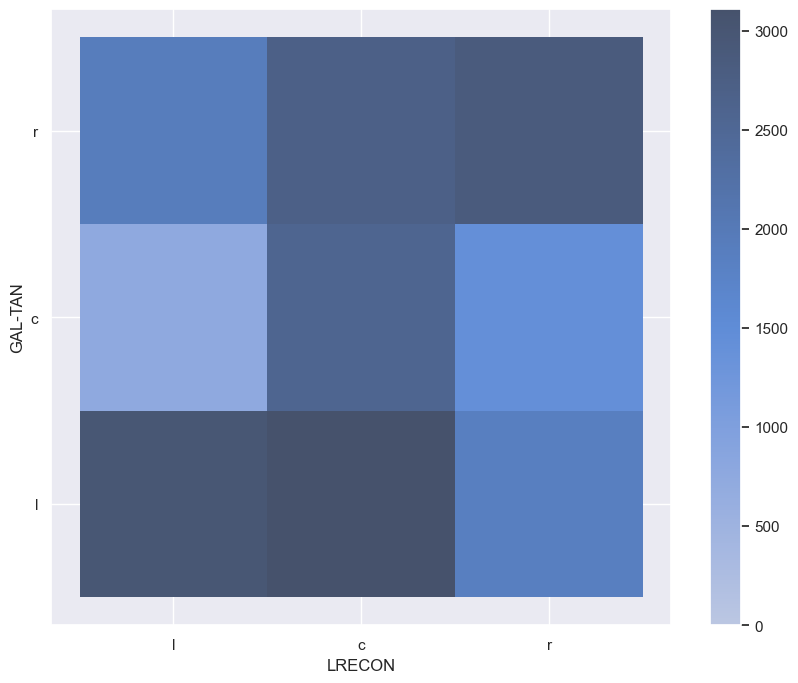

In [57]:
# plotdata = pd.Categorical(voter_data_full_woNAN[['predicted_values_galtan_reduced', 'predicted_values_lrecon_reduced']], ['l', 'c', 'r'])
y = pd.Categorical(voter_data_full_woNAN['predicted_values_galtan_reduced'], ['r', 'c', 'l'])
x = pd.Categorical(voter_data_full_woNAN['predicted_values_lrecon_reduced'], ['l', 'c', 'r'])

sns.set(rc={'figure.figsize':(10,8)})

diagram = sns.histplot(
    x=x, y=y, legend=True, bins = ['r', 'c', 'l'], stat = 'count', cbar = True, palette='Set2'
    # l = GAL, r = TAN --> GALTAN - description on axis
)
diagram.set(xlabel = 'LRECON', ylabel = 'GAL-TAN')
#Axes
plt.savefig('pics/LRECON_GALTAN_HEATMAP.png', dpi=300)

In [48]:
voter_data_overview = voter_data_full_woNAN[['predicted_values_galtan_reduced', 'predicted_values_lrecon_reduced']]

In [49]:
voter_data_overview.columns = [['GALTAN', 'LRECON']]

In [50]:
voter_data_overview.value_counts()

(GALTAN,)  (LRECON,)
l          c            3109
           l            2982
r          r            2848
           c            2698
c          c            2586
r          l            1930
l          r            1862
c          r            1422
           l             749
dtype: int64

# Countries: apply model to each country

In [ ]:
voter_data_full_woNAN.head()

In [ ]:
country_codes = {
    1:'AT',
    2:'BE',
    3:'BG',
    4:'HR',
    5:'CY',
    6:'CZ',
    7:'DE',
    8:'DK',
    9:'EE',
    10:'FI',
    11:'FR',
    12:'GR',
    13:'HU',
    14:'IE',
    15:'IT',
    16:'LV',
    17:'LT',
    18:'LU',
    19:'MT',
    20:'NL',
    21:'PL',
    22:'PT',
    23:'RO',
    24:'SI',
    25:'SK',
    26:'ES',
    27:'SE',
    28:'GB'
}

In [ ]:
voter_data = voter_data_full_woNAN[['hCountry','econ_interven', 'environment', 'redistribution', 'civlib_laworder', 'immigrate_policy', 'sociallifestyle', 'lrgen_selfdescription']]

In [ ]:
voter_data_full_woNAN

In [ ]:
voter_data['country_code'] = voter_data.loc[:,'hCountry'].replace(country_codes)

In [ ]:
voter_data

In [ ]:
unique_countries = voter_data['country_code'].unique()
#unique_countries = ['AT']

In [ ]:
for i in unique_countries:
    test_X = voter_data[voter_data['country_code']==i][['econ_interven', 'environment', 'redistribution', 'civlib_laworder', 'immigrate_policy', 'sociallifestyle']]
    test_y = voter_data[voter_data['country_code']==i][['lrgen_selfdescription']]
    tempdata_actual = test_y.copy()
    tempdata_actual['Type'] = 'Self description'
    tempdata_actual.columns = ['value', 'Type']
    tempdata_predicted = pd.DataFrame(modelRF_lrgen.predict(test_X))
    tempdata_predicted['Type'] = 'Prediction using expert model'
    tempdata_predicted.columns = ['value', 'Type']
    tempdata = pd.concat([tempdata_actual, tempdata_predicted]).reset_index(drop=True)
    ax = sns.histplot(data=tempdata, x='value', hue='Type', 
                      palette=['gold', 'g'], alpha = 0.5, 
                      multiple='layer', discrete=True
                      )
    plt.title('LRGEN: Country Code ' + i, fontsize = 24)
    ax.set(xlabel='Self description / Predicted Value',
           title = 'LRGEN: Country Code ' + i,
           
           #ylim=(0,4000),
           xticks=range(0,11))
    #plt.savefig('pics/LRGEN_' + i + '_SELF_VS_PREDICTION.png', dpi=300)
    plt.close()
    print(i)

In [ ]:
#for i in unique_countries:
#    print('\includegraphics[width = 0.49\\textwidth]{pics/appendix/LRGEN_' + i + '_SELF_VS_PREDICTION.png}')

In [ ]:
test_X = voter_data[voter_data['country_code']==i][['econ_interven', 'environment', 'redistribution', 'civlib_laworder', 'immigrate_policy', 'sociallifestyle']]
test_y = voter_data[voter_data['country_code']==i][['lrgen_selfdescription']]
tempdata_actual = test_y.copy()
tempdata_actual['Type'] = 'Self description'
tempdata_actual.columns = ['value', 'Type']
tempdata_predicted = pd.DataFrame(modelRF_lrgen.predict(test_X))
tempdata_predicted['Type'] = 'Prediction using expert model'
tempdata_predicted.columns = ['value', 'Type']
tempdata = pd.concat([tempdata_actual, tempdata_predicted]).reset_index(drop=True)
ax = sns.histplot(data=tempdata, x='value', hue='Type', 
                  palette=['gold', 'g'], alpha = 0.5, 
                  multiple='layer', discrete=True
                  )
plt.title('LRGEN: Country Code ' + i, fontsize = 24)
ax.set(xlabel='Self description / Predicted Value',
       #title = 'LRGEN: Country Code ' + i,
       #title.fontsize = 30,
       #ylim=(0,4000),
       xticks=range(0,11))
#plt.savefig('pics/LRGEN_' + i + '_SELF_VS_PREDICTION.png', dpi=300)
#plt.close()